# 📘 Impedance and Phase Plot from DATS Export

This notebook reads a text file exported from the Dayton Audio Test System (DATS) and plots impedance and phase versus frequency. 
The impedance is plotted on the left Y-axis, and the phase (dotted line) is plotted on the right Y-axis.

In [1]:
import matplotlib.pyplot as plt

In [13]:
# Define multiple file paths
file_paths = [
    "input_data/tube_impedance.txt",
    "input_data/tube_impedance_blocked.txt"
    #"input_data/tube_impedance_unblocked.txt"
]

all_data = []

for file_path in file_paths:
    frequencies = []
    impedances = []
    phases = []
    data_section = False

    with open(file_path, 'r') as file:
        for line in file:
            if line.strip().startswith("Freq"):
                data_section = True
                continue
            if data_section:
                try:
                    parts = line.strip().split()
                    if len(parts) >= 3:
                        frequencies.append(float(parts[0]))
                        impedances.append(float(parts[1]))
                        phases.append(float(parts[2]))
                except ValueError:
                    continue

    all_data.append({
        "file": file_path,
        "frequencies": frequencies,
        "impedances": impedances,
        "phases": phases
    })


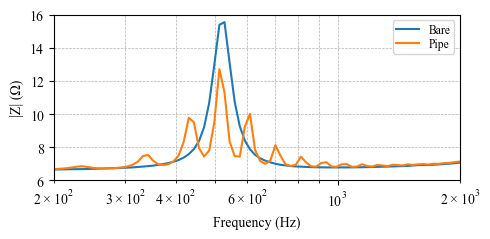

In [22]:
import matplotlib as mpl

# Set Times New Roman as the default font
mpl.rcParams['font.family'] = 'Times New Roman'

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(5, 2.5))

# Define colormap for consistent colors
colors = plt.cm.tab10.colors


labels = ["Free Air","In Pipe"]#, "Blocked", "Unblocked"]
# Plot impedance for each file
for idx, data in enumerate(all_data):
    ax1.plot(
        data["frequencies"], data["impedances"],
        color=colors[idx % len(colors)],
        label=labels[idx]#f'Impedance ({data["file"]})'
    )

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (Ω)')#'Impedance Magnitude (Ω)')#, color='tab:blue')
ax1.set_xscale('log')
ax1.tick_params(axis='y')#, labelcolor='tab:blue')
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_ylim([6, 16])
ax1.set_xlim([200, 2000])
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)



# Combine legends from both axes
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='best',labelspacing=0.2,borderpad=0.3,fontsize='small')

fig.tight_layout()

# Save the figure
plt.savefig('outputs/tube_impedance_plot.pdf', format='pdf')
plt.show()
